In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
from rdkit import Chem
import numpy as np
from collections import defaultdict
import sys
import pickle
import os
sys.path.append('../')
sys.path.append('../data_processing/')

from openbabel import pybel
import matplotlib
import matplotlib.pylab as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import random
import torch
from tqdm import tqdm
import py3Dmol


In [27]:
from data_processing.ligand import Ligand
from data_processing.utils import sample_probability
from script_utils import load_qm9_data

In [41]:
generated_path = '../lightning_logs/vp_bridge_QM9Dataset_2024-05-17_00_45_50.904966/reconstructed_mols'

## some mols in qm9 dataset have same smiles
- smiles can not be used as the unique identifier of the mol

In [6]:
raw_path = '../../data/qm9/raw/gdb9.sdf'

In [8]:
with open('../../data/qm9/raw/uncharacterized.txt', 'r') as f:
    skip = [int(x.split()[0]) - 1 for x in f.read().split('\n')[9:-2]]

In [19]:
suppl = Chem.SDMolSupplier(raw_path, removeHs=False)
ref_mols = []
smi_mol_map = defaultdict(list)
skip_num = 0
for i, rdmol in enumerate(tqdm(suppl)):
    if i in skip:
        skip_num += 1
        continue

    if rdmol is None:
        skip_num += 1
        continue
    ref_mols.append(rdmol)
    smi = Chem.MolToSmiles(rdmol)
    smi_mol_map[smi].append(rdmol)

  0%|                                                                                                                                                                  | 0/133885 [00:00<?, ?it/s][20:49:25] Warning: molecule is tagged as 3D, but all Z coords are zero
[20:49:25] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:49:25] ERROR: Could not sanitize molecule ending on line 2704
[20:49:25] ERROR: Explicit valence for atom # 1 C, 5, is greater than permitted
  0%|▏                                                                                                                                                     | 176/133885 [00:00<01:15, 1759.63it/s][20:49:25] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:49:25] ERROR: Could not sanitize molecule ending on line 9097
[20:49:25] ERROR: Explicit valence for atom # 1 C, 5, is greater than permitted
  0%|▋                                                                                                

  3%|███▉                                                                                                                                                 | 3521/133885 [00:04<01:48, 1200.75it/s][20:49:29] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:49:29] ERROR: Could not sanitize molecule ending on line 122616
[20:49:29] ERROR: Explicit valence for atom # 3 C, 5, is greater than permitted
[20:49:29] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:49:29] ERROR: Could not sanitize molecule ending on line 122653
[20:49:29] ERROR: Explicit valence for atom # 3 C, 5, is greater than permitted
[20:49:29] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:49:29] ERROR: Could not sanitize molecule ending on line 122888
[20:49:29] ERROR: Explicit valence for atom # 3 C, 5, is greater than permitted
[20:49:29] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:49:29] ERROR: Could not sanitize molecule ending on line 123006
[2

  6%|█████████▍                                                                                                                                            | 8415/133885 [00:09<02:53, 723.74it/s][20:49:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:49:35] ERROR: Could not sanitize molecule ending on line 314632
[20:49:35] ERROR: Explicit valence for atom # 1 C, 5, is greater than permitted
  6%|█████████▌                                                                                                                                            | 8491/133885 [00:09<03:15, 641.13it/s][20:49:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:49:35] ERROR: Could not sanitize molecule ending on line 314816
[20:49:35] ERROR: Explicit valence for atom # 1 C, 5, is greater than permitted
[20:49:35] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:49:35] ERROR: Could not sanitize molecule ending on line 315050
[20:49:35] ERROR: Explicit va

 11%|████████████████                                                                                                                                     | 14423/133885 [00:17<03:21, 593.50it/s][20:49:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:49:43] ERROR: Could not sanitize molecule ending on line 555340
[20:49:43] ERROR: Explicit valence for atom # 1 C, 5, is greater than permitted
[20:49:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:49:43] ERROR: Could not sanitize molecule ending on line 555603
[20:49:43] ERROR: Explicit valence for atom # 1 C, 5, is greater than permitted
[20:49:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:49:43] ERROR: Could not sanitize molecule ending on line 555644
[20:49:43] ERROR: Explicit valence for atom # 1 C, 5, is greater than permitted
 11%|████████████████                                                                                                                          

 13%|██████████████████▉                                                                                                                                  | 17058/133885 [00:21<03:21, 580.06it/s][20:49:47] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:49:47] ERROR: Could not sanitize molecule ending on line 660495
[20:49:47] ERROR: Explicit valence for atom # 3 C, 5, is greater than permitted
[20:49:47] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:49:47] ERROR: Could not sanitize molecule ending on line 660762
[20:49:47] ERROR: Explicit valence for atom # 3 C, 5, is greater than permitted
[20:49:47] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:49:47] ERROR: Could not sanitize molecule ending on line 660925
[20:49:47] ERROR: Explicit valence for atom # 3 C, 5, is greater than permitted
 13%|███████████████████                                                                                                                       

 13%|███████████████████▋                                                                                                                                 | 17734/133885 [00:22<02:07, 909.83it/s][20:49:48] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:49:48] ERROR: Could not sanitize molecule ending on line 689291
[20:49:48] ERROR: Explicit valence for atom # 4 C, 5, is greater than permitted
[20:49:48] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:49:48] ERROR: Could not sanitize molecule ending on line 689373
[20:49:48] ERROR: Explicit valence for atom # 4 C, 5, is greater than permitted
[20:49:48] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:49:48] ERROR: Could not sanitize molecule ending on line 689492
[20:49:48] ERROR: Explicit valence for atom # 4 C, 5, is greater than permitted
[20:49:48] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:49:48] ERROR: Could not sanitize molecule ending on line 690453
[2

 15%|██████████████████████▌                                                                                                                              | 20270/133885 [00:26<02:44, 691.97it/s][20:49:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:49:52] ERROR: Could not sanitize molecule ending on line 793830
[20:49:52] ERROR: Explicit valence for atom # 4 C, 5, is greater than permitted
[20:49:52] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:49:52] ERROR: Could not sanitize molecule ending on line 794001
[20:49:52] ERROR: Explicit valence for atom # 3 C, 5, is greater than permitted
[20:49:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:49:52] ERROR: Could not sanitize molecule ending on line 794122
[20:49:52] ERROR: Explicit valence for atom # 4 C, 5, is greater than permitted
[20:49:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:49:52] ERROR: Could not sanitize molecule ending on line 794160
[2

 26%|█████████████████████████████████████▉                                                                                                               | 34145/133885 [00:43<02:15, 735.33it/s][20:50:09] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:09] ERROR: Could not sanitize molecule ending on line 1326481
[20:50:09] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:09] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:09] ERROR: Could not sanitize molecule ending on line 1326520
[20:50:09] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:09] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:09] ERROR: Could not sanitize molecule ending on line 1326557
[20:50:09] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
 26%|██████████████████████████████████████▏                                                                                                

 27%|████████████████████████████████████████▏                                                                                                            | 36153/133885 [00:46<01:43, 941.71it/s][20:50:11] Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:11] ERROR: Could not sanitize molecule ending on line 1409156
[20:50:11] ERROR: Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:11] Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:11] ERROR: Could not sanitize molecule ending on line 1409284
[20:50:11] ERROR: Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:50:11] ERROR: Could not sanitize molecule ending on line 1409327
[20:50:11] ERROR: Explicit valence for atom # 3 C, 5, is greater than permitted
[20:50:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:50:11] ERROR: Could not sanitize molecule ending on line 140936

 28%|█████████████████████████████████████████▋                                                                                                           | 37455/133885 [00:47<01:46, 904.68it/s][20:50:13] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:13] ERROR: Could not sanitize molecule ending on line 1468445
[20:50:13] ERROR: Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:13] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:13] ERROR: Could not sanitize molecule ending on line 1468624
[20:50:13] ERROR: Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:13] Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:13] ERROR: Could not sanitize molecule ending on line 1470389
[20:50:13] ERROR: Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:13] Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:13] ERROR: Could not sanitize molecule ending on line 147055

 28%|██████████████████████████████████████████▏                                                                                                          | 37852/133885 [00:48<01:45, 907.51it/s][20:50:13] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:13] ERROR: Could not sanitize molecule ending on line 1485305
[20:50:13] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:50:13] ERROR: Could not sanitize molecule ending on line 1485475
[20:50:13] ERROR: Explicit valence for atom # 1 C, 5, is greater than permitted
[20:50:13] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:13] ERROR: Could not sanitize molecule ending on line 1486482
[20:50:13] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:13] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:13] ERROR: Could not sanitize molecule ending on line 148652

 30%|████████████████████████████████████████████▎                                                                                                        | 39862/133885 [00:51<01:53, 828.98it/s][20:50:16] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:16] ERROR: Could not sanitize molecule ending on line 1583228
[20:50:16] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:16] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:16] ERROR: Could not sanitize molecule ending on line 1583319
[20:50:16] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
 30%|████████████████████████████████████████████▌                                                                                                        | 39989/133885 [00:51<01:38, 951.92it/s][20:50:16] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:16] ERROR: Could not sanitize molecule ending on line 1583456
[20:50:16] ERROR: Explicit

 31%|█████████████████████████████████████████████▉                                                                                                       | 41312/133885 [00:52<02:18, 669.61it/s][20:50:18] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:18] ERROR: Could not sanitize molecule ending on line 1651307
[20:50:18] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:18] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:18] ERROR: Could not sanitize molecule ending on line 1651351
[20:50:18] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
 31%|██████████████████████████████████████████████                                                                                                       | 41442/133885 [00:52<01:53, 816.94it/s][20:50:18] Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:18] ERROR: Could not sanitize molecule ending on line 1651487
[20:50:18] ERROR: Explicit

 33%|█████████████████████████████████████████████████▎                                                                                                   | 44306/133885 [00:56<01:58, 757.35it/s][20:50:21] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:21] ERROR: Could not sanitize molecule ending on line 1768668
[20:50:21] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:21] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:21] ERROR: Could not sanitize molecule ending on line 1768833
[20:50:21] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:21] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:21] ERROR: Could not sanitize molecule ending on line 1768996
[20:50:21] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:21] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:21] ERROR: Could not sanitize molecule ending on line 176907

 36%|█████████████████████████████████████████████████████▍                                                                                               | 47972/133885 [01:01<01:47, 797.02it/s][20:50:26] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:26] ERROR: Could not sanitize molecule ending on line 1917509
[20:50:26] ERROR: Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:26] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:26] ERROR: Could not sanitize molecule ending on line 1918006
[20:50:26] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
 36%|█████████████████████████████████████████████████████▍                                                                                               | 48055/133885 [01:01<01:49, 787.17it/s][20:50:27] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:27] ERROR: Could not sanitize molecule ending on line 1921029
[20:50:27] ERROR: Explicit

 37%|███████████████████████████████████████████████████████▌                                                                                             | 49900/133885 [01:03<01:56, 722.20it/s][20:50:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:29] ERROR: Could not sanitize molecule ending on line 1995630
[20:50:29] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
 37%|███████████████████████████████████████████████████████▊                                                                                             | 50106/133885 [01:03<01:46, 783.68it/s][20:50:29] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:29] ERROR: Could not sanitize molecule ending on line 2003468
[20:50:29] ERROR: Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:29] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:29] ERROR: Could not sanitize molecule ending on line 2003724
[20:50:29] ERROR: Explicit

 39%|██████████████████████████████████████████████████████████▊                                                                                          | 52857/133885 [01:07<01:36, 836.41it/s][20:50:32] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:50:32] ERROR: Could not sanitize molecule ending on line 2117366
[20:50:32] ERROR: Explicit valence for atom # 3 C, 5, is greater than permitted
 40%|███████████████████████████████████████████████████████████                                                                                          | 53023/133885 [01:07<01:43, 783.35it/s][20:50:33] Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:33] ERROR: Could not sanitize molecule ending on line 2121182
[20:50:33] ERROR: Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:33] Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:33] ERROR: Could not sanitize molecule ending on line 2121310
[20:50:33] ERROR: Explicit

 41%|████████████████████████████████████████████████████████████▉                                                                                        | 54763/133885 [01:09<01:23, 950.79it/s][20:50:34] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:50:34] ERROR: Could not sanitize molecule ending on line 2193982
[20:50:34] ERROR: Explicit valence for atom # 1 C, 5, is greater than permitted
 42%|█████████████████████████████████████████████████████████████▌                                                                                      | 55668/133885 [01:10<01:14, 1043.12it/s][20:50:36] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:36] ERROR: Could not sanitize molecule ending on line 2234406
[20:50:36] ERROR: Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:36] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:36] ERROR: Could not sanitize molecule ending on line 2234727
[20:50:36] ERROR: Explicit

 44%|█████████████████████████████████████████████████████████████████▍                                                                                   | 58842/133885 [01:14<01:36, 781.26it/s][20:50:39] Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:39] ERROR: Could not sanitize molecule ending on line 2376558
[20:50:39] ERROR: Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:39] Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:39] ERROR: Could not sanitize molecule ending on line 2376710
[20:50:39] ERROR: Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:39] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:50:39] ERROR: Could not sanitize molecule ending on line 2376761
[20:50:39] ERROR: Explicit valence for atom # 3 C, 5, is greater than permitted
 44%|█████████████████████████████████████████████████████████████████▌                                                                     

 47%|█████████████████████████████████████████████████████████████████████▋                                                                               | 62620/133885 [01:18<01:43, 688.11it/s][20:50:44] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:44] ERROR: Could not sanitize molecule ending on line 2547022
[20:50:44] ERROR: Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:44] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:44] ERROR: Could not sanitize molecule ending on line 2547267
[20:50:44] ERROR: Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:44] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:44] ERROR: Could not sanitize molecule ending on line 2547569
[20:50:44] ERROR: Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:44] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:44] ERROR: Could not sanitize molecule ending on line 254761

 48%|███████████████████████████████████████████████████████████████████████▋                                                                             | 64449/133885 [01:21<01:37, 712.58it/s][20:50:46] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:46] ERROR: Could not sanitize molecule ending on line 2634359
[20:50:46] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:46] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:46] ERROR: Could not sanitize molecule ending on line 2634464
[20:50:46] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:46] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:46] ERROR: Could not sanitize molecule ending on line 2634561
[20:50:46] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:46] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:46] ERROR: Could not sanitize molecule ending on line 263470

 50%|██████████████████████████████████████████████████████████████████████████▋                                                                          | 67104/133885 [01:24<01:48, 616.14it/s][20:50:50] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:50] ERROR: Could not sanitize molecule ending on line 2747586
[20:50:50] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:50] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:50] ERROR: Could not sanitize molecule ending on line 2747727
[20:50:50] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:50] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:50] ERROR: Could not sanitize molecule ending on line 2747771
[20:50:50] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
[20:50:50] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:50] ERROR: Could not sanitize molecule ending on line 274804

 51%|███████████████████████████████████████████████████████████████████████████▎                                                                         | 67716/133885 [01:25<01:43, 641.65it/s][20:50:51] Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:51] ERROR: Could not sanitize molecule ending on line 2774799
[20:50:51] ERROR: Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:51] Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:51] ERROR: Could not sanitize molecule ending on line 2774932
[20:50:51] ERROR: Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:51] Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:51] ERROR: Could not sanitize molecule ending on line 2775053
[20:50:51] ERROR: Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:51] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:50:51] ERROR: Could not sanitize molecule ending on line 277565

 51%|████████████████████████████████████████████████████████████████████████████                                                                         | 68320/133885 [01:26<01:39, 659.34it/s][20:50:52] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:50:52] ERROR: Could not sanitize molecule ending on line 2801572
[20:50:52] ERROR: Explicit valence for atom # 1 C, 5, is greater than permitted
[20:50:52] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:50:52] ERROR: Could not sanitize molecule ending on line 2801616
[20:50:52] ERROR: Explicit valence for atom # 1 C, 5, is greater than permitted
 51%|████████████████████████████████████████████████████████████████████████████▎                                                                        | 68545/133885 [01:26<01:48, 603.39it/s][20:50:52] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:50:52] ERROR: Could not sanitize molecule ending on line 2812881
[20:50:52] ERROR: Explicit

[20:50:58] Explicit valence for atom # 6 C, 5, is greater than permitted
[20:50:58] ERROR: Could not sanitize molecule ending on line 2919195
[20:50:58] ERROR: Explicit valence for atom # 6 C, 5, is greater than permitted
 53%|███████████████████████████████████████████████████████████████████████████████                                                                      | 71020/133885 [01:32<01:46, 588.55it/s][20:50:58] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:50:58] ERROR: Could not sanitize molecule ending on line 2922456
[20:50:58] ERROR: Explicit valence for atom # 1 C, 5, is greater than permitted
[20:50:58] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:50:58] ERROR: Could not sanitize molecule ending on line 2922922
[20:50:58] ERROR: Explicit valence for atom # 1 C, 5, is greater than permitted
[20:50:58] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:50:58] ERROR: Could not sanitize molecule ending on line 292296

[20:50:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:50:59] ERROR: Could not sanitize molecule ending on line 2947513
[20:50:59] ERROR: Explicit valence for atom # 1 C, 5, is greater than permitted
[20:50:59] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:50:59] ERROR: Could not sanitize molecule ending on line 2948086
[20:50:59] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
 53%|███████████████████████████████████████████████████████████████████████████████▋                                                                     | 71602/133885 [01:33<01:23, 743.41it/s][20:50:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:50:59] ERROR: Could not sanitize molecule ending on line 2948371
[20:50:59] ERROR: Explicit valence for atom # 1 C, 5, is greater than permitted
[20:50:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:50:59] ERROR: Could not sanitize molecule ending on line 294841

 56%|██████████████████████████████████████████████████████████████████████████████████▊                                                                  | 74356/133885 [01:37<01:27, 682.10it/s][20:51:03] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:03] ERROR: Could not sanitize molecule ending on line 3074299
[20:51:03] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:03] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:03] ERROR: Could not sanitize molecule ending on line 3074432
[20:51:03] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
 56%|██████████████████████████████████████████████████████████████████████████████████▉                                                                  | 74501/133885 [01:37<01:25, 696.32it/s][20:51:03] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:51:03] ERROR: Could not sanitize molecule ending on line 3080472
[20:51:03] ERROR: Explicit

 58%|██████████████████████████████████████████████████████████████████████████████████████▏                                                              | 77451/133885 [01:41<01:16, 737.73it/s][20:51:07] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:07] ERROR: Could not sanitize molecule ending on line 3212112
[20:51:07] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
 58%|██████████████████████████████████████████████████████████████████████████████████████▎                                                              | 77526/133885 [01:41<01:22, 685.84it/s][20:51:07] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:07] ERROR: Could not sanitize molecule ending on line 3213941
[20:51:07] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:07] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:07] ERROR: Could not sanitize molecule ending on line 3214420
[20:51:07] ERROR: Explicit

 60%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 80745/133885 [01:45<00:59, 894.81it/s][20:51:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:11] ERROR: Could not sanitize molecule ending on line 3361853
[20:51:11] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:11] ERROR: Could not sanitize molecule ending on line 3361938
[20:51:11] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:11] ERROR: Could not sanitize molecule ending on line 3361980
[20:51:11] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:11] ERROR: Could not sanitize molecule ending on line 336202

 61%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 81458/133885 [01:46<00:55, 940.34it/s][20:51:12] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:51:12] ERROR: Could not sanitize molecule ending on line 3393324
[20:51:12] ERROR: Explicit valence for atom # 4 C, 5, is greater than permitted
[20:51:12] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:51:12] ERROR: Could not sanitize molecule ending on line 3393448
[20:51:12] ERROR: Explicit valence for atom # 4 C, 5, is greater than permitted
[20:51:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:12] ERROR: Could not sanitize molecule ending on line 3393989
[20:51:12] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:12] ERROR: Could not sanitize molecule ending on line 339403

 63%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 84509/133885 [01:49<00:42, 1148.45it/s][20:51:15] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:15] ERROR: Could not sanitize molecule ending on line 3532822
[20:51:15] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:15] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:15] ERROR: Could not sanitize molecule ending on line 3532960
[20:51:15] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:15] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:15] ERROR: Could not sanitize molecule ending on line 3533376
[20:51:15] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:15] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:15] ERROR: Could not sanitize molecule ending on line 353351

 67%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 89972/133885 [01:56<01:02, 697.74it/s][20:51:21] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:51:21] ERROR: Could not sanitize molecule ending on line 3783853
[20:51:21] ERROR: Explicit valence for atom # 3 C, 5, is greater than permitted
[20:51:21] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:51:21] ERROR: Could not sanitize molecule ending on line 3784102
[20:51:21] ERROR: Explicit valence for atom # 3 C, 5, is greater than permitted
 67%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 90055/133885 [01:56<01:02, 700.61it/s][20:51:21] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:21] ERROR: Could not sanitize molecule ending on line 3784762
[20:51:21] ERROR: Explicit

 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 96859/133885 [02:05<00:33, 1110.16it/s][20:51:30] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:31] ERROR: Could not sanitize molecule ending on line 4104730
[20:51:31] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 97341/133885 [02:05<00:33, 1100.54it/s][20:51:31] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:31] ERROR: Could not sanitize molecule ending on line 4123883
[20:51:31] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 97587/133885 

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 103126/133885 [02:11<00:29, 1027.13it/s][20:51:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:37] ERROR: Could not sanitize molecule ending on line 4388271
[20:51:37] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:37] ERROR: Could not sanitize molecule ending on line 4388482
[20:51:37] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:37] ERROR: Could not sanitize molecule ending on line 4388628
[20:51:37] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:37] ERROR: Could not sanitize molecule ending on line 438877

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 107811/133885 [02:18<00:35, 736.29it/s][20:51:43] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:43] ERROR: Could not sanitize molecule ending on line 4607092
[20:51:43] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:43] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:43] ERROR: Could not sanitize molecule ending on line 4607380
[20:51:43] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:51:43] ERROR: Could not sanitize molecule ending on line 4607526
[20:51:43] ERROR: Explicit valence for atom # 3 C, 5, is greater than permitted
[20:51:43] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:51:43] ERROR: Could not sanitize molecule ending on line 460798

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 110353/133885 [02:21<00:28, 811.92it/s][20:51:47] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:51:47] ERROR: Could not sanitize molecule ending on line 4725748
[20:51:47] ERROR: Explicit valence for atom # 3 C, 5, is greater than permitted
 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 110523/133885 [02:21<00:31, 748.58it/s][20:51:47] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:51:47] ERROR: Could not sanitize molecule ending on line 4733108
[20:51:47] ERROR: Explicit valence for atom # 1 C, 5, is greater than permitted
[20:51:47] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:51:47] ERROR: Could not sanitize molecule ending on line 4733316
[20:51:47] ERROR: Explicit

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 111154/133885 [02:22<00:31, 715.29it/s][20:51:48] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:51:48] ERROR: Could not sanitize molecule ending on line 4761770
[20:51:48] ERROR: Explicit valence for atom # 3 C, 5, is greater than permitted
[20:51:48] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:51:48] ERROR: Could not sanitize molecule ending on line 4762186
[20:51:48] ERROR: Explicit valence for atom # 3 C, 5, is greater than permitted
[20:51:48] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:51:48] ERROR: Could not sanitize molecule ending on line 4762231
[20:51:48] ERROR: Explicit valence for atom # 3 C, 5, is greater than permitted
[20:51:48] Explicit valence for atom # 3 C, 5, is greater than permitted
[20:51:48] ERROR: Could not sanitize molecule ending on line 476255

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 116632/133885 [02:30<00:19, 898.11it/s][20:51:55] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:55] ERROR: Could not sanitize molecule ending on line 5023004
[20:51:55] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 118682/133885 [02:32<00:18, 802.93it/s][20:51:58] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:58] ERROR: Could not sanitize molecule ending on line 5117047
[20:51:58] ERROR: Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:58] Explicit valence for atom # 5 C, 5, is greater than permitted
[20:51:58] ERROR: Could not sanitize molecule ending on line 5117158
[20:51:58] ERROR: Explicit

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 120094/133885 [02:34<00:13, 993.85it/s][20:52:00] Explicit valence for atom # 1 C, 5, is greater than permitted
[20:52:00] ERROR: Could not sanitize molecule ending on line 5188330
[20:52:00] ERROR: Explicit valence for atom # 1 C, 5, is greater than permitted
[20:52:00] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:52:00] ERROR: Could not sanitize molecule ending on line 5188493
[20:52:00] ERROR: Explicit valence for atom # 4 C, 5, is greater than permitted
[20:52:00] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:52:00] ERROR: Could not sanitize molecule ending on line 5188852
[20:52:00] ERROR: Explicit valence for atom # 4 C, 5, is greater than permitted
[20:52:00] Explicit valence for atom # 2 C, 5, is greater than permitted
[20:52:00] ERROR: Could not sanitize molecule ending on line 518982

In [20]:
len(ref_mols)

129428

In [21]:
len(smi_mol_map.keys())

129272

In [26]:
with open('../../data/qm9/metadata/smiles_rdmol_mapping.pkl', 'wb') as f:
    pickle.dump(smi_mol_map, f)

In [28]:
test_dataset, test_loader = load_qm9_data(root='../../data/qm9', split='test', batch_size=1)

In [38]:
len(test_dataset)

12944

In [42]:
mols = []
gen_map = defaultdict(list)
for file in tqdm(os.listdir(generated_path)):
    smi = file.split('.')[0]
    m = Chem.MolFromMolFile(os.path.join(generated_path, file))
    mols.append(m)
    gen_map[smi] = m

  0%|                                                                                                                                                                    | 0/4437 [00:00<?, ?it/s][13:04:12] Explicit valence for atom # 3 N, 4, is greater than permitted
[13:04:12] Explicit valence for atom # 5 N, 4, is greater than permitted
[13:04:12] Explicit valence for atom # 0 N, 4, is greater than permitted
[13:04:12] Explicit valence for atom # 3 N, 4, is greater than permitted
[13:04:12] Explicit valence for atom # 4 N, 4, is greater than permitted
[13:04:12] Explicit valence for atom # 1 N, 4, is greater than permitted
[13:04:12] Explicit valence for atom # 7 N, 4, is greater than permitted
[13:04:12] Explicit valence for atom # 3 N, 4, is greater than permitted
[13:04:12] Explicit valence for atom # 9 N, 4, is greater than permitted
[13:04:12] Explicit valence for atom # 9 N, 4, is greater than permitted
[13:04:12] Explicit valence for atom # 4 N, 4, is greater than permitted
[13

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 3521/4437 [00:00<00:00, 7125.64it/s][13:04:13] Explicit valence for atom # 0 N, 4, is greater than permitted
[13:04:13] Explicit valence for atom # 10 N, 4, is greater than permitted
[13:04:13] Explicit valence for atom # 0 N, 4, is greater than permitted
[13:04:13] Explicit valence for atom # 1 N, 4, is greater than permitted
[13:04:13] Explicit valence for atom # 5 N, 4, is greater than permitted
[13:04:13] Explicit valence for atom # 3 N, 4, is greater than permitted
[13:04:13] Explicit valence for atom # 4 N, 4, is greater than permitted
[13:04:13] Explicit valence for atom # 7 N, 4, is greater than permitted
[13:04:13] Explicit valence for atom # 5 N, 4, is greater than permitted
[13:04:13] Explicit valence for atom # 0 N, 4, is greater than permitted
[13:04:13] Explicit valence for atom # 7 N, 4, is greater than permitted
[1

In [43]:
len(mols), len(gen_map.keys())

(4437, 4437)

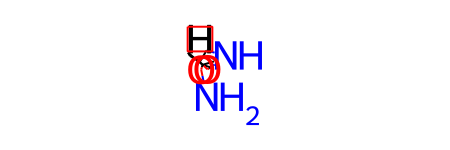

In [49]:
mols[4000]

In [55]:
v = py3Dmol.view()
v.addModel(open('../lightning_logs/vp_bridge_QM9Dataset_2024-05-17_00_45_50.904966/reconstructed_mols/[H][N-][C@@H]1O[C@]([H])(C(=O)N([H])[H])[C@]1([H])O[H].sdf').read())
v.setStyle({'model':0},{'stick':{'colorscheme':'greenCarbon','radius':.125}})

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [44]:
repeated_ref_mol = 0
for smi in gen_map.keys():
    ref_mols = smi_mol_map[smi]
    if len(ref_mols) > 1:
        repeated_ref_mol += 1

repeated_ref_mol

3

In [40]:
one = test_dataset[0]
one

Data(x=[34, 8], pos=[34, 3], target_x=[34, 8], target_pos=[34, 3], Gt_mask=[34], ligand_name='[H]N([H])[C@]1([H])C(=O)OC([H])([H])C([H])([H])C1([H])[H]')

In [56]:
one.x

tensor([[0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0

In [58]:
x = one.x
x[~one.Gt_mask] = torch.rand_like(x[~one.Gt_mask])
x

tensor([[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
        [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.000

In [ ]:
target_x = one.target_x[one.Gt_mask]

In [ ]:
for batch in test_loader:
    if batch.ligand_name not in gen_map.keys():
        continue
    

In [39]:
with open('../../data/qm9/metadata/pp_info.pkl', 'rb') as f:
    pp_info = pickle.load(f)
pp_info

defaultdict(dict,
            {'[H]C([H])([H])[H]': {'pp_atom_indices': [[0]],
              'pp_positions': tensor([[-0.0127,  1.0858,  0.0080]]),
              'pp_types': tensor([[0., 1., 0., 0., 0., 0., 0., 0.]]),
              'pp_index': tensor([0]),
              'node_pp_index': tensor([ 0, -1, -1, -1, -1])},
             '[H]N([H])[H]': {'pp_atom_indices': [[0]],
              'pp_positions': tensor([[-0.0404,  1.0241,  0.0626]]),
              'pp_types': tensor([[0., 0., 0., 0., 0., 1., 0., 0.]]),
              'pp_index': tensor([0]),
              'node_pp_index': tensor([ 0, -1, -1, -1])},
             '[H]O[H]': {'pp_atom_indices': [[0]],
              'pp_positions': tensor([[-0.0344,  0.9775,  0.0076]]),
              'pp_types': tensor([[0., 0., 0., 0., 0., 1., 0., 0.]]),
              'pp_index': tensor([0]),
              'node_pp_index': tensor([ 0, -1, -1])},
             '[H]C#C[H]': {'pp_atom_indices': [[0], [1]],
              'pp_positions': tensor([[ 0.5995, 

In [45]:
gen_pp_info = {k:v for k, v in pp_info.items() if k in gen_map.keys()}
gen_pp_info

{'[H]C([H])([H])[H]': {'pp_atom_indices': [[0]],
  'pp_positions': tensor([[-0.0127,  1.0858,  0.0080]]),
  'pp_types': tensor([[0., 1., 0., 0., 0., 0., 0., 0.]]),
  'pp_index': tensor([0]),
  'node_pp_index': tensor([ 0, -1, -1, -1, -1])},
 '[H]C([H])([H])OC([H])([H])C([H])([H])[H]': {'pp_atom_indices': [[2], [0]],
  'pp_positions': tensor([[ 0.6976, -0.4634,  1.1687],
          [-0.0052,  1.5087,  0.0331]]),
  'pp_types': tensor([[0., 0., 0., 0., 0., 0., 1., 0.],
          [0., 1., 0., 0., 0., 0., 0., 0.]]),
  'pp_index': tensor([0, 1]),
  'node_pp_index': tensor([ 1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1])},
 '[H]c1c([H])c([H])n([H])c1[H]': {'pp_atom_indices': [[0, 1, 2, 3, 4]],
  'pp_positions': tensor([[ 0.9399,  0.6931, -0.0030]]),
  'pp_types': tensor([[0., 0., 1., 0., 0., 0., 0., 0.]]),
  'pp_index': tensor([0]),
  'node_pp_index': tensor([ 0,  0,  0,  0,  0, -1, -1, -1, -1, -1])},
 '[H]C([H])(C#N)C#N': {'pp_atom_indices': [[2], [0], [4]],
  'pp_positions': tensor([[ 0.012